## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'north'

Note: This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [6]:
def simple_environment(agent, n, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, n = 5, max_steps = 20)

step 0 - action: west
step 1 - action: west
step 2 - action: west
step 3 - action: suck
step 4 - action: north
step 5 - action: suck
step 6 - action: east
step 7 - action: east
step 8 - action: west
step 9 - action: suck
step 10 - action: suck
step 11 - action: east
step 12 - action: suck
step 13 - action: west
step 14 - action: suck
step 15 - action: west
step 16 - action: north
step 17 - action: south
step 18 - action: suck
step 19 - action: south


7

# Tasks

## Task 1: Implement a simulation environment

The simple environment above is not very realistic. This environment simulator needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The implementation holds a 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

## Notes on implementation:

My approach on this task began with an agent that reacts only to dirt.  If the square is dirty, the robot will clean it.  If not, the robot will randomly attempt to move to another square.

The testing environment is a 5x5 grid with 1's and 0's.  A 1 means the square is dirty. A 0 means the square is clean.  There is a 20% chance each square will be dirty.  The robot will continue until either all dirty squares are clean or until it's out of energy.

In [8]:
import numpy as np

actions = ["north", "east", "west", "south"]

# This randomized agent reacts to dirt; cleans if dirty, moves if not
def randomized_agent(bumpers, dirty):
  if(dirty):
    return "suck"
  else:
    return np.random.choice(actions)

def simulation_environment(agent, n, max_steps, verbose = True):

  # Creating the environment/starting parameters
  rng = np.random.default_rng()
  p = .2
  values = []
  steps = 0
  cleaned = 0

  # Generate the environment of clean and dirty squares
  for i in range(n*n):
    values.append(rng.random() < p)

  env = np.array(values).reshape(n, n)
  env = 1*env

  # Count of dirty squares in the environment
  dirty_count = env.sum()

  # The robot spawns into the environment
  pos = [np.random.randint(0, n - 1), np.random.randint(0, n - 1)]


  # The robot begins cleaning the environment
  while(steps < max_steps and cleaned < dirty_count):
      # Get the location into x and y coordinates
      x, y = pos
      # If the square is dirty or not
      dirty = env[x, y]

      # Bumper sensor to pass into the agent (not considered for this task)
      bumpers = {"north" : x == 0, "south" : x == n - 1, "west" : y == 0, "east" : y == n - 1}

      # Call agent function to react to the dirt sensor and the bumper sensor
      action = agent(bumpers, dirty)

      # Step 1
      if (verbose): print("step", steps + 1, ": position:", pos, "action: ", action)

      # Update the location and/or cleanliness status of the square based on the action
      if (action == "suck"):
        cleaned += 1
        env[pos] = False
      elif(action == "north" and bumpers["north"] == False):
        pos[0] -= 1
      elif(action == "east" and bumpers["east"] == False):
        pos[1] += 1
      elif(action == "west" and bumpers["west"] == False):
        pos[1] -= 1
      elif(action == "south" and bumpers["south"] == False):
        pos[0] += 1

      # Move onto the next step
      steps += 1

  return cleaned, steps



In [9]:
# Run the agent in the environment
cleaned, steps = simulation_environment(randomized_agent, n = 5, max_steps = 20)
print(f"Finished: Energy used (performance measure): {steps}\nTotal cleaned: {cleaned}, Steps taken: {steps}")

step 1 : position: [3, 2] action:  suck
step 2 : position: [3, 2] action:  east
step 3 : position: [3, 3] action:  south
step 4 : position: [4, 3] action:  west
step 5 : position: [4, 2] action:  east
step 6 : position: [4, 3] action:  east
step 7 : position: [4, 4] action:  north
step 8 : position: [3, 4] action:  east
step 9 : position: [3, 4] action:  east
step 10 : position: [3, 4] action:  north
step 11 : position: [2, 4] action:  west
step 12 : position: [2, 3] action:  north
step 13 : position: [1, 3] action:  west
step 14 : position: [1, 2] action:  east
step 15 : position: [1, 3] action:  south
step 16 : position: [2, 3] action:  south
step 17 : position: [3, 3] action:  north
step 18 : position: [2, 3] action:  east
step 19 : position: [2, 4] action:  south
step 20 : position: [3, 4] action:  north
Finished: Energy used (performance measure): 20
Total cleaned: 1, Steps taken: 20


## Task 2:  Implement a simple reflex agent

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. 

## Notes on implementation:

My approach on this task began with an agent that reacts only to dirt.  If the square is dirty, the robot will clean it.  If not, the robot will randomly attempt to move to another square.  This time, the robot will not proceed if it is blocked by one of the walls.  It does this by randomly generating an action, but if the bumper sensor is activated, it will generate another action.  Only an action that isn't blocked will be returned to the environment.

This task uses the same environment from the last task.  The testing environment is a 5x5 grid with 1's and 0's.  A 1 means the square is dirty. A 0 means the square is clean.  There is a 20% chance each square will be dirty.  The robot will continue until either all dirty squares are clean or until it's out of energy.

In [10]:
import numpy as np

# Possible actions
actions = ["north", "east", "west", "south"]

# Creating the simple reflex agent
#    This agent reacs to bumper sensors, unlike the other one
def simple_reflex_agent(bumpers, dirty):
  if(dirty):
    return "suck"
  else:
    while(True):
      # Randomly generates an action and checks to see if it's blocked
      action = np.random.choice(actions)
      # Proceed if not blocked
      if(bumpers[action] == False):
          return action
          break


In [11]:
# Run the agent in the environment
cleaned, steps = simulation_environment(simple_reflex_agent, n = 5, max_steps = 20)
print(f"Finished: Energy used (performance measure): {steps}\nTotal cleaned: {cleaned}, Steps taken: {steps}")

step 1 : position: [0, 3] action:  south
step 2 : position: [1, 3] action:  east
step 3 : position: [1, 4] action:  north
step 4 : position: [0, 4] action:  south
step 5 : position: [1, 4] action:  south
step 6 : position: [2, 4] action:  west
step 7 : position: [2, 3] action:  east
step 8 : position: [2, 4] action:  south
step 9 : position: [3, 4] action:  west
step 10 : position: [3, 3] action:  south
step 11 : position: [4, 3] action:  west
step 12 : position: [4, 2] action:  east
step 13 : position: [4, 3] action:  north
step 14 : position: [3, 3] action:  south
step 15 : position: [4, 3] action:  east
step 16 : position: [4, 4] action:  west
step 17 : position: [4, 3] action:  west
step 18 : position: [4, 2] action:  north
step 19 : position: [3, 2] action:  suck
step 20 : position: [3, 2] action:  north
Finished: Energy used (performance measure): 20
Total cleaned: 1, Steps taken: 20


## Task 3: Implement a model-based reflex agent

Model-based agents use a state to keep track of what they have done and perceived so far. This agent needs to find out where it is located and then keep track of its current location. There also needs to be a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

## Notes on implementation:

My approach on this task begins with creating an Agent class.  The class keeps track of the robot's location, unlike previous agents.  It has two actions: go to the corner and the standard cleaning action.  The first action is going to the corner, where it's not cleaning anything but simply relocating to the northwest corner.  Then, the "act" is called, in which the robot goes from one side of the grid to the other to clean, moving down when it has completed a row.

The environment is slightly modified, as the robot keeps track of its location.  The environment includes a start where the robot finds the corner, and then begins cleaning.  What's different is that the location is updated and stored within the robot instead of the environment.

In [12]:
# Creating a model-based agent
class Agent:
    def __init__(self, pos = [0, 0], name = "Agent"):
        # Initialization parameters
        self.pos = pos
        self.x = pos[0]
        self.y = pos[1]
        self.name = name

    # Updates the location, the robot keeps track
    def update_loc(self, action):
        if(action == "north"):
          self.x -= 1
        elif(action == "south"):
          self.x += 1
        elif(action == "west"):
          self.y -= 1
        elif(action == "east"):
          self.y += 1

    # Return the location of the robot
    def get_loc(self):
        return [self.x, self.y]

    # Return the x-coordinate of the robot
    def get_loc_x(self):
        return self.x

    # Return the y-coordinate of the robot
    def get_loc_y(self):
        return self.y

    # The robot finds the northwest corner
    def go_to_corner(self, go_here):
        action = go_here

        if(go_here == "north" and self.x > 0):
          self.pos = [self.x - 1, self.y]
        elif(go_here == "west" and self.y > 0):
          self.pos = ([self.x, self.y - 1])

        return action

    # Cleans the room from the corner
    def act(self, bumpers, dirty):
        if(dirty):
          return "suck"
        # If on an even row (0, 2, 4...), the robot will move east and then move
        #    south if the wall is encountered
        elif(self.x % 2 == 0):
          if(bumpers["east"] == True):
            return "south"
          else:
            return "east"
        # If on an odd row (1, 3, 5...), the robot will move west and then move
        #    south if the wall is encountered
        elif(self.x % 2 == 1):
          if(bumpers["west"] == True):
            return "south"
          else:
            return "west"


In [13]:
# Creating an environment for the model-based reflex agent
def new_environment(agent, n, max_steps, verbose = True):

  # Creating the environment/starting parameters
  rng = np.random.default_rng()
  p = .2
  values = []
  steps = 0
  cleaned = 0

  # Create the environment of clean and dirty squares
  for i in range(n*n):
    values.append(rng.random() < p)

  env = np.array(values).reshape(n, n)
  env = 1*env

  # Count of all dirty squares in the environment
  dirty_count = env.sum()

  # Finding the x-coordinate of the northwest corner
  while(agent.get_loc_x() != 0):
    action = agent.go_to_corner("north")
    if (verbose): print("step", steps + 1, ": position:", agent.get_loc(), "action: ", action)
    agent.update_loc(action)
    steps += 1

  # Finding the y-coordinate of the northwest corner
  while(agent.get_loc_y() != 0):
    action = agent.go_to_corner("west")
    if (verbose): print("step", steps + 1, ": position:", agent.get_loc(), "action: ", action)
    agent.update_loc(action)
    steps += 1

  # Cleaning the environment
  while(steps < max_steps and cleaned < dirty_count):
      # Get the x and y coordinates of the robot's location
      x = agent.get_loc_x()
      y = agent.get_loc_y()

      # If a square is dirty or not
      dirty = env[x, y]

      # Bumper information
      bumpers = {"north" : x == 0, "south" : x == n - 1, "west" : y == 0, "east" : y == n - 1}

      # Generate an action based on the bumper and dirt sensor
      action = agent.act(bumpers, dirty)

      # Step 1
      if (verbose): print("step", steps + 1, ": position:", agent.get_loc(), "action: ", action)

      # Robot either cleans or moves
      if(action == "suck"):
        cleaned += 1
        env[tuple(agent.get_loc())] = 0
      else:
        agent.update_loc(action)

      # Move to next step
      steps += 1

  return cleaned, steps

In [14]:
# Running the agent in the environment
n = 5
pos = [np.random.randint(0, n - 1), np.random.randint(0, n - 1)]
agent = Agent(pos = pos, name = "Agent")
cleaned, steps = new_environment(agent, n = 5, max_steps = 100)
print(f"Finished: Energy used (performance measure): {steps}\nTotal cleaned: {cleaned}, Steps taken: {steps}")

step 1 : position: [3, 3] action:  north
step 2 : position: [2, 3] action:  north
step 3 : position: [1, 3] action:  north
step 4 : position: [0, 3] action:  west
step 5 : position: [0, 2] action:  west
step 6 : position: [0, 1] action:  west
step 7 : position: [0, 0] action:  suck
step 8 : position: [0, 0] action:  east
step 9 : position: [0, 1] action:  east
step 10 : position: [0, 2] action:  east
step 11 : position: [0, 3] action:  east
step 12 : position: [0, 4] action:  south
step 13 : position: [1, 4] action:  west
step 14 : position: [1, 3] action:  west
step 15 : position: [1, 2] action:  west
step 16 : position: [1, 1] action:  west
step 17 : position: [1, 0] action:  south
step 18 : position: [2, 0] action:  east
step 19 : position: [2, 1] action:  east
step 20 : position: [2, 2] action:  east
step 21 : position: [2, 3] action:  east
step 22 : position: [2, 4] action:  south
step 23 : position: [3, 4] action:  west
step 24 : position: [3, 3] action:  west
step 25 : position:

## Task 4: Simulation study [30 Points]

Comparison of the performance (the performance measure is defined in the PEAS description above) of the agents using environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Used 100 random runs for each and the results are presented using tables and graphs.

In [15]:
# Initialize empty lists for all the performance scores
ra_perf = []
sra_perf = []
mra_perf = []

# Buffer
temp = []

# Reflex agent - 5x5
for i in range(100):
  cleaned, steps = simulation_environment(randomized_agent, n = 5, max_steps = 1000, verbose = False)
  temp.append(steps)

ra_perf.append(temp)
temp = []

# Reflex agent - 10x10
for i in range(100):
  cleaned, steps = simulation_environment(randomized_agent, n = 10, max_steps = 1000, verbose = False)
  temp.append(steps)

ra_perf.append(temp)
temp = []

# Reflex agent - 100x100
for i in range(100):
  cleaned, steps = simulation_environment(randomized_agent, n = 100, max_steps = 1000, verbose = False)
  temp.append(steps)

ra_perf.append(temp)
temp = []


# Simple reflex agent - 5x5
for i in range(100):
  cleaned, steps = simulation_environment(simple_reflex_agent, n = 5, max_steps = 1000, verbose = False)
  temp.append(steps)

sra_perf.append(temp)
temp = []

# Simple reflex agent - 10x10
for i in range(100):
  cleaned, steps = simulation_environment(simple_reflex_agent, n = 10, max_steps = 1000, verbose = False)
  temp.append(steps)

sra_perf.append(temp)
temp = []

# Simple reflex agent - 10x10
for i in range(100):
  cleaned, steps = simulation_environment(simple_reflex_agent, n = 100, max_steps = 1000, verbose = False)
  temp.append(steps)

sra_perf.append(temp)
temp = []


# Model-based reflex agent - 5x5
for i in range(100):
  n = 5
  pos = [np.random.randint(0, n - 1), np.random.randint(0, n - 1)]
  agent = Agent(pos = pos, name = "Agent 5")
  cleaned, steps = new_environment(agent, n = n, max_steps = 1000, verbose = False)
  temp.append(steps)

mra_perf.append(temp)
temp = []

# Model-based reflex agent - 10x10
for i in range(100):
  n = 10
  pos = [np.random.randint(0, n - 1), np.random.randint(0, n - 1)]
  agent = Agent(pos = pos, name = "Agent 5")
  cleaned, steps = new_environment(agent, n = n, max_steps = 1000, verbose = False)
  temp.append(steps)

mra_perf.append(temp)
temp = []

# Model-based reflex agent - 100x100
for i in range(100):
  n = 100
  pos = [np.random.randint(0, n - 1), np.random.randint(0, n - 1)]
  agent = Agent(pos = pos, name = "Agent 5")
  cleaned, steps = new_environment(agent, n = n, max_steps = 1000, verbose = False)
  temp.append(steps)

mra_perf.append(temp)
temp = []

In [16]:
# Gather each average
average_ra_5 = np.mean(ra_perf[0])
average_ra_10 = np.mean(ra_perf[1])
average_ra_100 = np.mean(ra_perf[2])
average_sra_5 = np.mean(sra_perf[0])
average_sra_10 = np.mean(sra_perf[1])
average_sra_100 = np.mean(sra_perf[2])
average_mra_5 = np.mean(mra_perf[0])
average_mra_10 = np.mean(mra_perf[1])
average_mra_100 = np.mean(mra_perf[2])

# Store the averages
average_ra = [average_ra_5, average_ra_10, average_ra_100]
average_sra = [average_sra_5, average_sra_10, average_sra_100]
average_mra = [average_mra_5, average_mra_10, average_mra_100]

# Cumulative averages
averages = [average_ra, average_sra, average_mra]

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |897.99|898.6|28.24 |
| 10x10   |1000.0 |1000.0 |124.48 |
| 100x100 |1000.0 |1000.0 |1000.0 |

Add charts to compare the performance of the different agents.

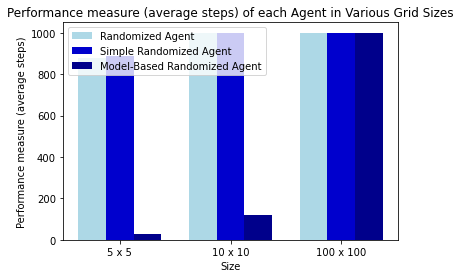

In [17]:
import matplotlib.pyplot as plt

# Aesthetic graph parameters
N = 3
ind = np.arange(N)
width = 0.25

# Set up each of the bars (an agent per bar)
bar1 = plt.bar(ind, average_ra, width, color = 'lightblue')
bar2 = plt.bar(ind+width, average_sra, width, color='mediumblue')
bar3 = plt.bar(ind+width*2, average_mra, width, color = 'darkblue')

# Graph labels
plt.xlabel("Size")
plt.ylabel('Performance measure (average steps)')
plt.title("Performance measure (average steps) of each Agent in Various Grid Sizes")

# Generate the graph
plt.xticks(ind+width,['5 x 5', '10 x 10', '100 x 100'] )
plt.legend((bar1, bar2, bar3), ('Randomized Agent', 'Simple Randomized Agent', 'Model-Based Randomized Agent'))
plt.show()

## Explanation

Overall, the randomized agent and the simple randomized agent performed relatively similarly.  This makes sense because both agents rely on pure randomization, even if one has a parameter that reduces some randomness.  The model-based random agent seemed to perform better, as it was certain that it would hit all the squares.  While the random agents might have circled all around the grid without checking all the squares.  However, for a 100x100, all models seemed to perform the same.  With a higher max_steps count, a difference might be more apparent.